# Wine Quality Prediction and Deployment

# Problem Statement
The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry
players are using product quality certifications to promote their products. This is a time-consuming process
and requires the assessment given by human experts, which makes this process very expensive.

Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters,
opinions among whom may have a high degree of variability. Another vital factor in red wine certification and
quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH
level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of
tasting can be related to wine’s chemical properties so that certification and quality assessment and
assurance processes are more controlled.

Determine which features are the best quality red wine indicators and generate insights into each of these
factors to our model’s red wine quality. Predict the quality of wine on the basis of giving features. Deploy the
model.

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data
df=pd.read_csv("Red Wine Quality.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#Checking for Duplicate
df.duplicated().sum()

240

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1359, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

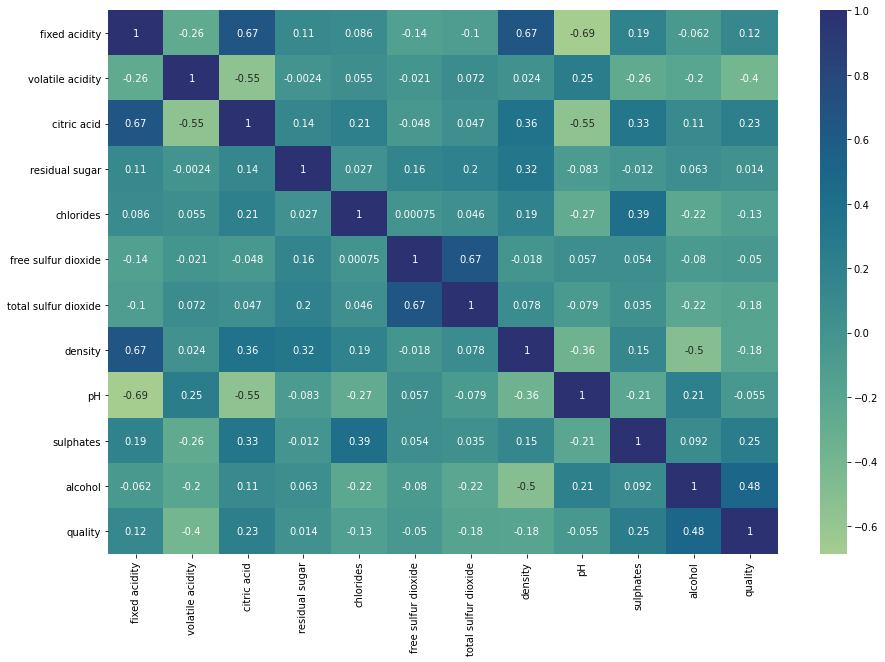

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='crest', annot=True)

In [13]:
corr = df.corr()
corr['quality']

fixed acidity           0.119024
volatile acidity       -0.395214
citric acid             0.228057
residual sugar          0.013640
chlorides              -0.130988
free sulfur dioxide    -0.050463
total sulfur dioxide   -0.177855
density                -0.184252
pH                     -0.055245
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

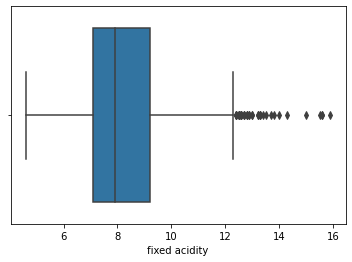

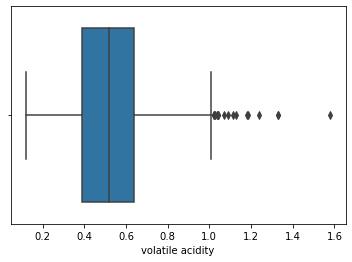

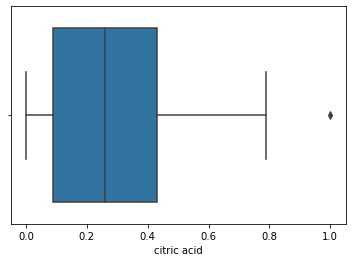

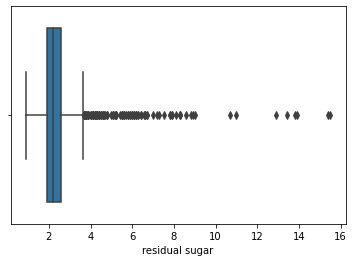

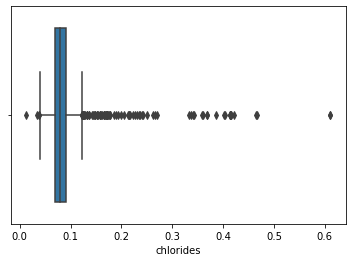

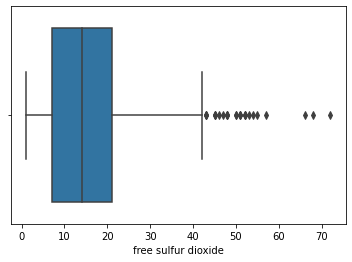

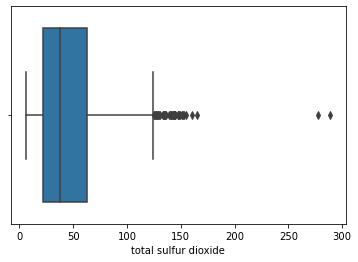

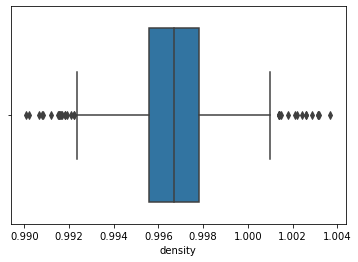

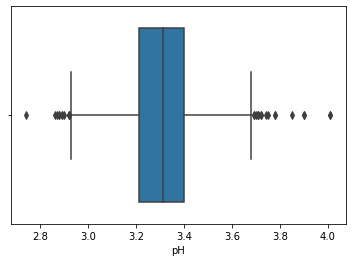

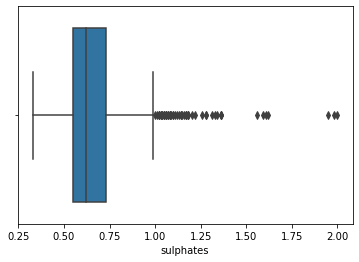

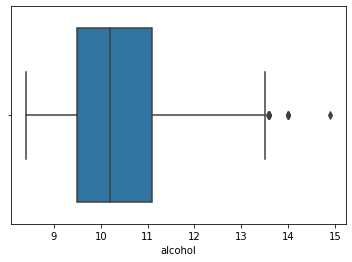

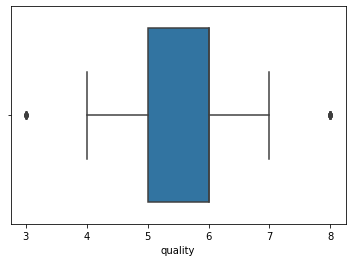

In [14]:
for col in df:
    plt.figure()
    sns.boxplot(df[col])

In [15]:
columns=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

for i in columns:
    Q1=df[i].quantile(.25)
    Q3=df[i].quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    def limit_imputer(value):
        if value>upper_limit:
            return upper_limit
        if value<lower_limit:
            return lower_limit
        else:
            return value
    df[i]=df[i].apply(limit_imputer)

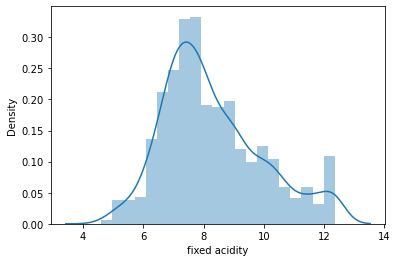

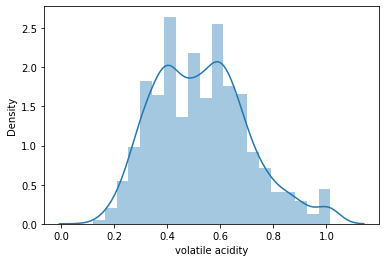

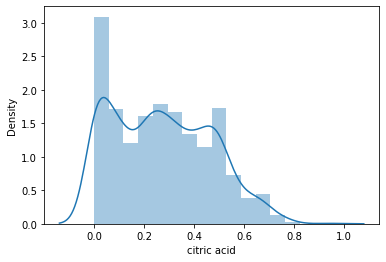

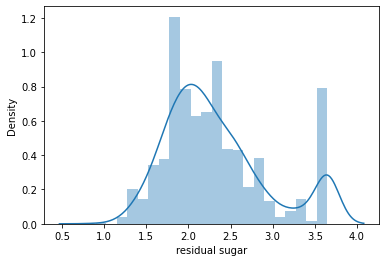

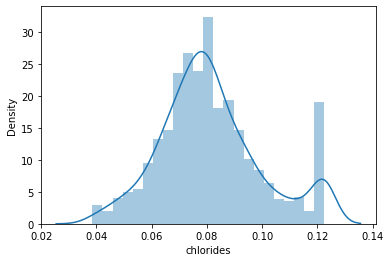

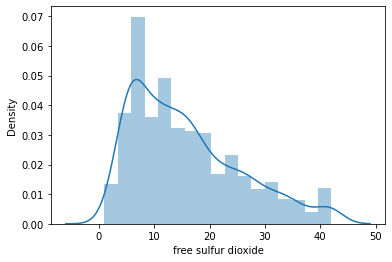

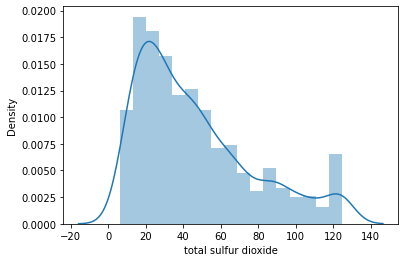

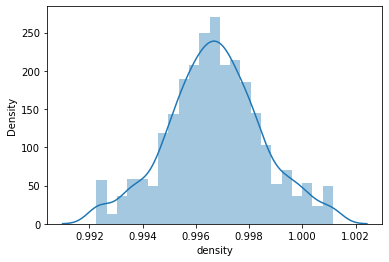

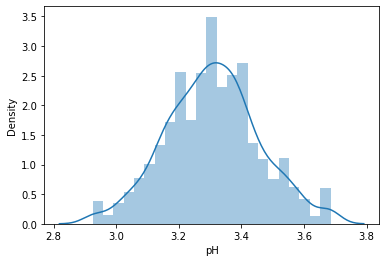

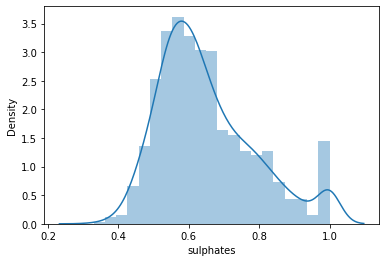

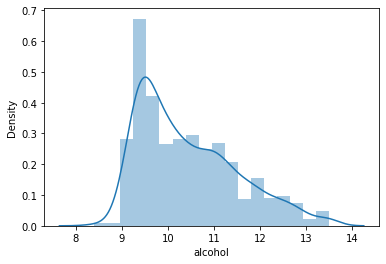

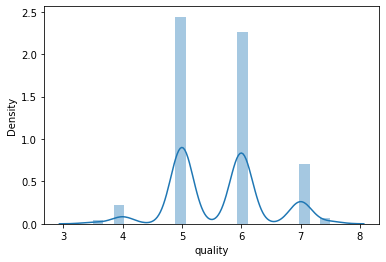

In [16]:
for col in df:
    plt.figure()
    sns.distplot(df[col])

In [17]:
from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]))

fixed acidity
0.6746570377006976
volatile acidity
0.45936386063250617
citric acid
0.30515656925160684
residual sugar
0.8316036965298272
chlorides
0.4875884975898469
free sulfur dioxide
0.8545521461042445
total sulfur dioxide
0.9761845388671718
density
0.010324437474877381
pH
0.0681846086648433
sulphates
0.8170413858991991
alcohol
0.7927761245781921
quality
0.1769725247324402


# Univeriate Analysis

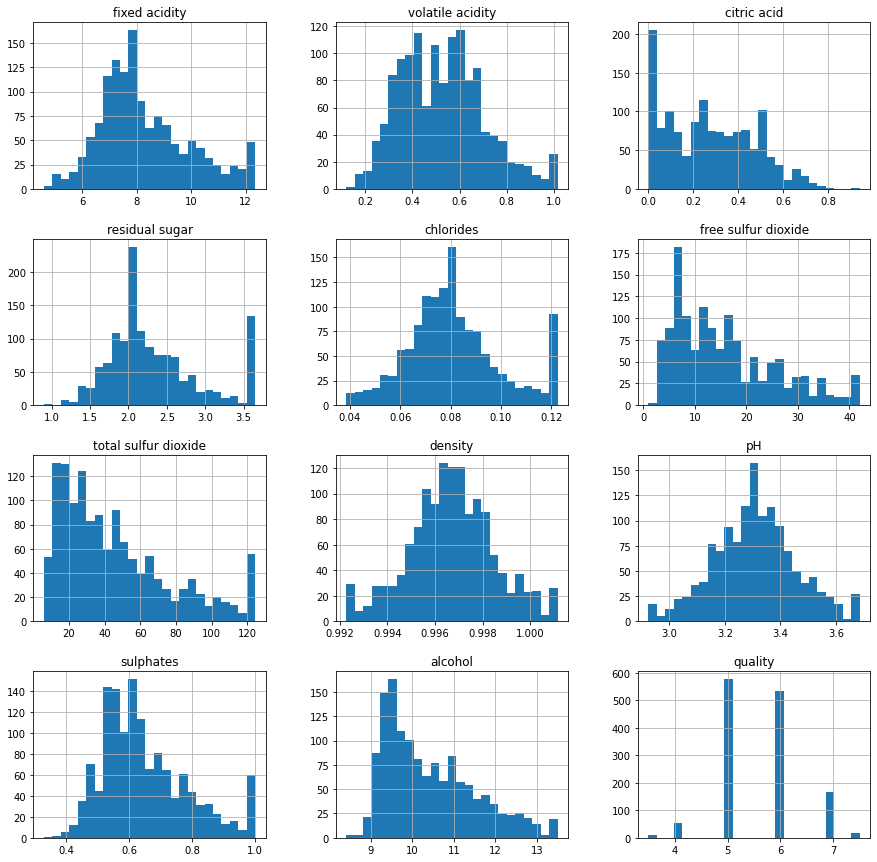

In [18]:
df.hist(bins=25,figsize=(15,15))
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

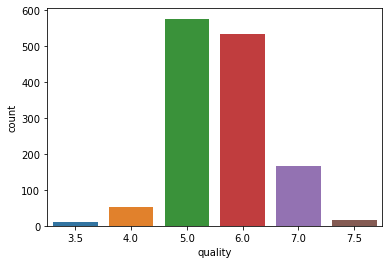

In [19]:
sns.countplot(df['quality'])

# Bivariate Analysis

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

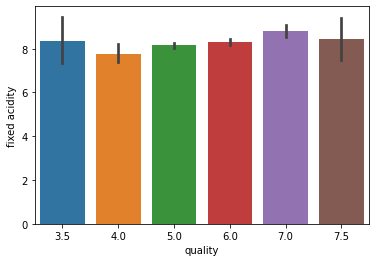

In [20]:
sns.barplot(x='quality',y='fixed acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

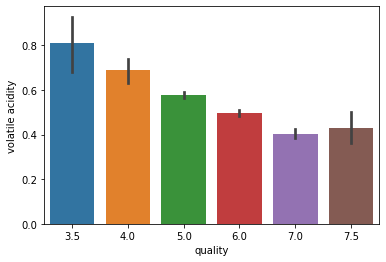

In [21]:
sns.barplot(x='quality',y='volatile acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

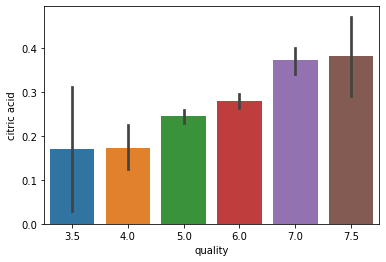

In [22]:
sns.barplot(x='quality',y='citric acid',data=df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

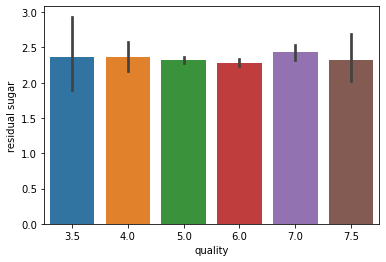

In [23]:
sns.barplot(x='quality',y='residual sugar',data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

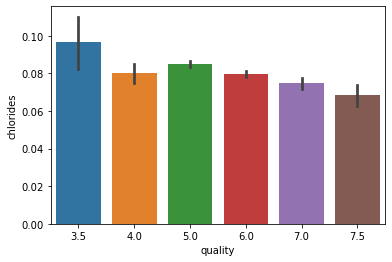

In [24]:
sns.barplot(x='quality',y='chlorides',data=df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

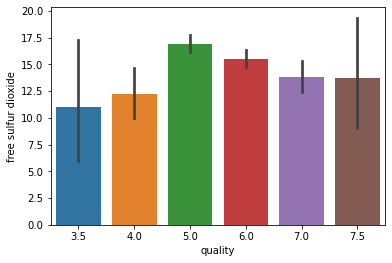

In [25]:
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

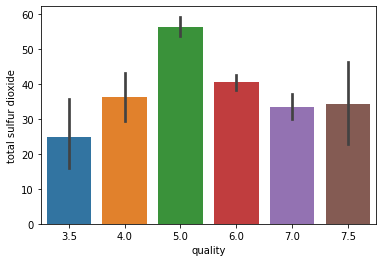

In [26]:
sns.barplot(x='quality',y='total sulfur dioxide',data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

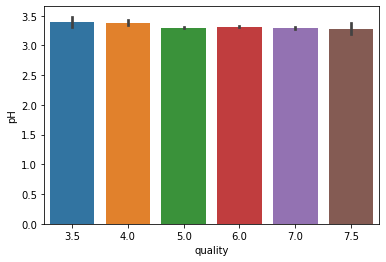

In [27]:
sns.barplot(x='quality',y='pH',data=df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

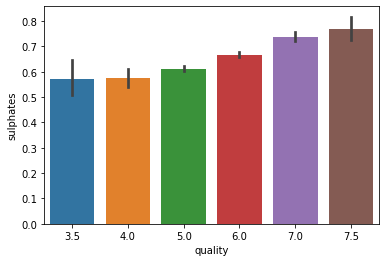

In [28]:
sns.barplot(x='quality',y='sulphates',data=df)

<AxesSubplot:xlabel='quality', ylabel='density'>

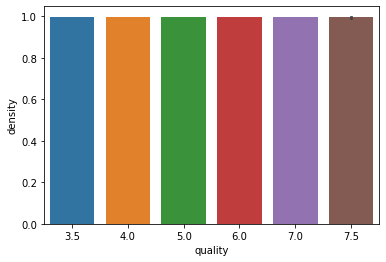

In [29]:
sns.barplot(x='quality',y='density',data=df)

In [30]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [31]:
#removing imbalancedness
df['quality_map']=df['quality'].map({3:'bad',4:'bad',
                                    5:'avg',6:'avg',
                                    7:'good',8:'good'})

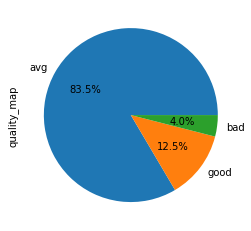

In [32]:
df['quality_map'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

In [33]:
df['quality_map'].value_counts()

avg     1112
good     167
bad       53
Name: quality_map, dtype: int64

<AxesSubplot:xlabel='quality_map', ylabel='pH'>

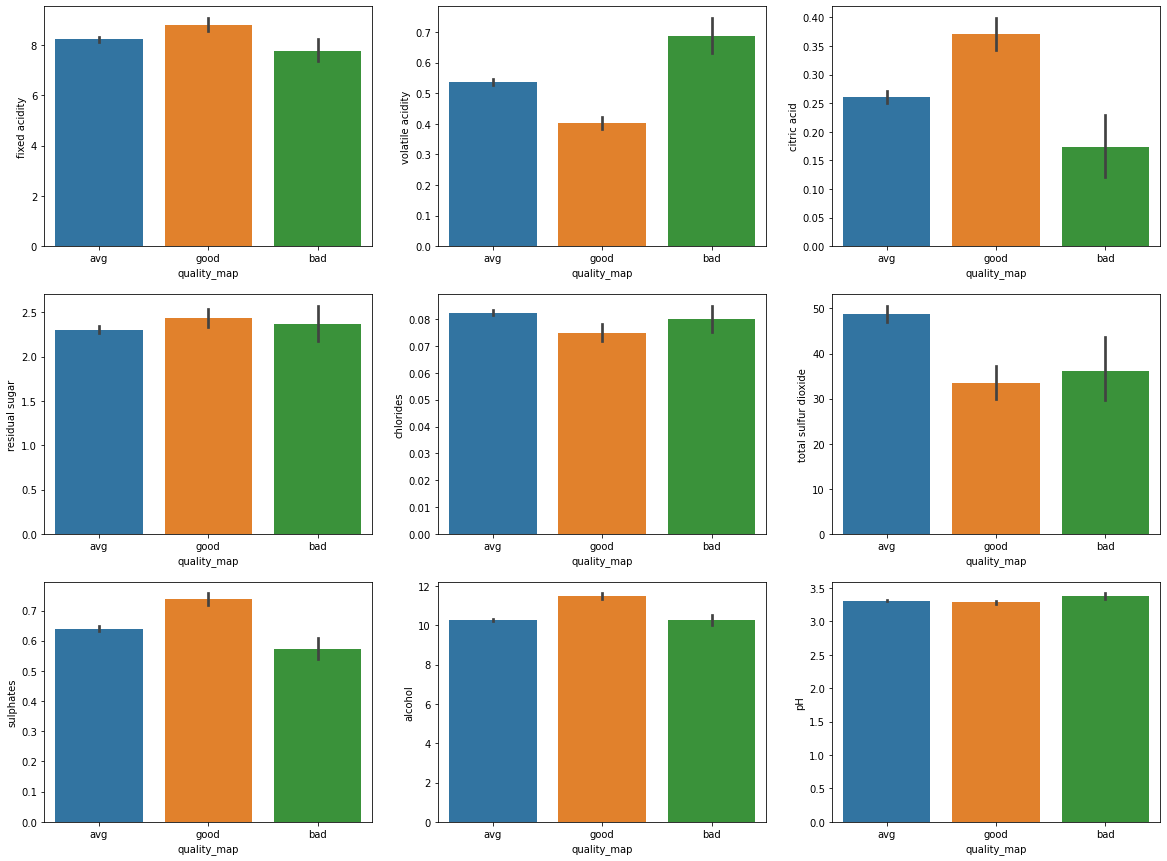

In [34]:
fig = plt.figure(figsize=(20,15))
fig.add_subplot(331)
sns.barplot(x = 'quality_map', y = 'fixed acidity', data = df)
fig.add_subplot(332)
sns.barplot(x = 'quality_map', y = 'volatile acidity', data = df)
fig.add_subplot(333)
sns.barplot(x = 'quality_map', y = 'citric acid', data = df)
fig.add_subplot(334)
sns.barplot(x = 'quality_map', y = 'residual sugar', data = df)
fig.add_subplot(335)
sns.barplot(x = 'quality_map', y = 'chlorides', data = df)
fig.add_subplot(336)
sns.barplot(x = 'quality_map', y = 'total sulfur dioxide', data = df)
fig.add_subplot(337)
sns.barplot(x = 'quality_map', y = 'sulphates', data = df)
fig.add_subplot(338)
sns.barplot(x = 'quality_map', y = 'alcohol', data = df)
fig.add_subplot(339)
sns.barplot(x = 'quality_map', y = 'pH', data = df)

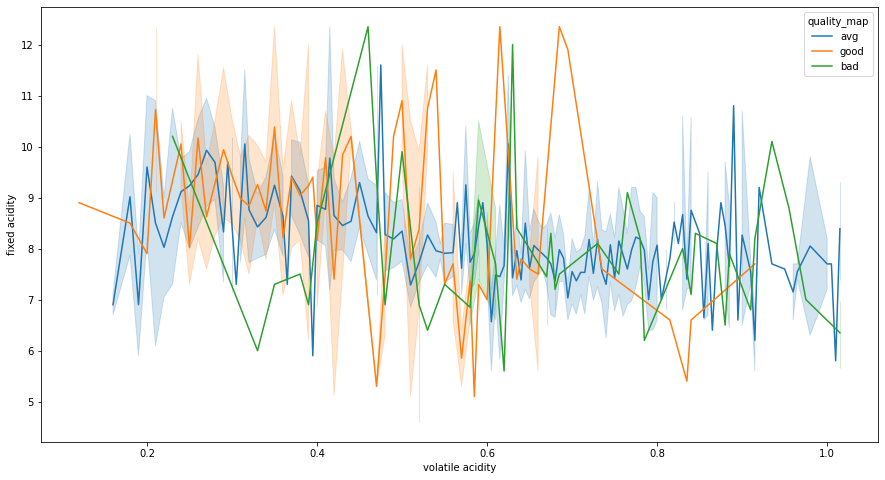

In [35]:
#Multiveriate Analysis
figure = plt.figure(figsize=(15,8))
sns.lineplot(x="volatile acidity",y="fixed acidity",hue="quality_map",data=df)
plt.show()

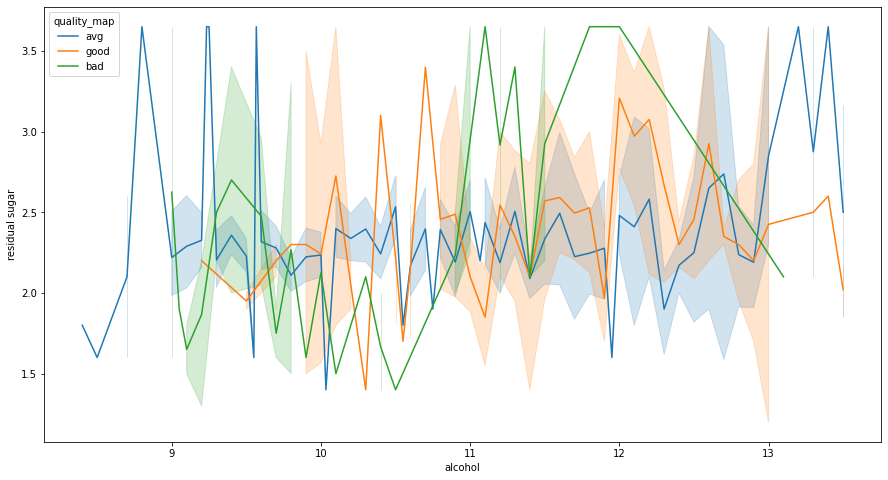

In [36]:
figure = plt.figure(figsize=(15,8))
sns.lineplot(x="alcohol",y="residual sugar",hue="quality_map",data=df)
plt.show()

In [37]:
df.isnull().sum()

fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
quality_map             27
dtype: int64

In [38]:
df = df.dropna()

# Modeling

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
x=df.drop(['quality','quality_map'],axis=1)
y=df.iloc[:,-1:]

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

In [42]:
# creating the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# feeding the training set into the model
model.fit(x_train, y_train)
# predicting the results for the test set
y_pred = model.predict(x_test)
y_pred_train=model.predict(x_train)
# calculating the training and testing accuracies
print("Training accuracy :", accuracy_score(y_pred_train, y_train))
print("Testing accuracy :",accuracy_score(y_pred, y_test))

Training accuracy : 0.8468468468468469
Testing accuracy : 0.8408408408408409


In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
Train_pred=rfc.predict(x_train)
Test_pred=rfc.predict(x_test)
print('Training Accuracy :',accuracy_score(y_train,Train_pred))
print('Test Accuracy :',accuracy_score(y_test,Test_pred))

Training Accuracy : 1.0
Test Accuracy : 0.8348348348348348


In [44]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
train_predicted = dtree.predict(x_train)
test_predicted = dtree.predict(x_test)
print('Training Accuracy :',accuracy_score(y_train,train_predicted ))
print('Test Accuracy :',accuracy_score(y_test,test_predicted))

Training Accuracy : 1.0
Test Accuracy : 0.7507507507507507


# Insights